In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [80]:
import seaborn as sns

### Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.
#### Решение

In [7]:
salary = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [8]:
AA=0
for item in salary:
    AA = AA + item
MO = AA/len(salary)
print("Математическое ожидание:", MO)

Математическое ожидание: 73.14285714285714


Среднее квадратичное отклонение:$$\sigma = \sqrt{\frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2}{n}}$$

In [9]:
AA = 0
for item in salary:
    AA = AA + ((item - MO)**2)
QO = (AA/len(salary))**0.5
print("Квадратичное отклонение:", QO)

Квадратичное отклонение: 46.20686994302874


Смещенная и несмещенная оценки дисперсии:$$\sigma^2 = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2$$
$$\sigma_{unbiased}^2 = \dfrac{1}{m - 1} \displaystyle\sum_{i = 1}^m \left( x_i - \overline{x} \right)^2$$

In [10]:
AA = 0
for item in salary:
    AA = AA + ((item - MO)**2)
D_biased = AA/len(salary)
D_unbiased = AA/(len(salary)-1)
print("Смещенная дисперсия:", D_biased)
print("Несмещенная дисперсия:", D_unbiased)

Смещенная дисперсия: 2135.074829931973
Несмещенная дисперсия: 2241.8285714285716


In [22]:
#проверим вычисления через встроенные библиотеки
a = np.array(salary)
print("Математическое ожидание:", a.mean())
print("Квадратичное отклонение:", a.std(ddof=0))
print("Смещенная дисперсия:", a.var())
print("Несмещенная дисперсия:", a.var(ddof=1))

Математическое ожидание: 73.14285714285714
Квадратичное отклонение: 46.206869943028735
Смещенная дисперсия: 2135.0748299319725
Несмещенная дисперсия: 2241.828571428571


### Задача 2

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выборсы в выборке (используя для этого метод как при построении "усов" из boxplot).

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.
#### Решение

##### найдем медиану, первый и третий квартили, интерквартильное расстояние,

In [52]:
salary_sorted = sorted(salary)
length = len(salary_sorted)
b = pd.Series(salary)
print(length)
print(salary_sorted)

21
[17, 24, 25, 30, 33, 45, 55, 57, 65, 65, 70, 75, 75, 77, 80, 84, 89, 90, 100, 150, 230]


In [54]:
#salary_sorted[length//2-1:length//2+1]

#ввиду того, что получили нечетную длину выборки, медиана будет посередине отсортированного массива
salary_sorted[length//2]

70

In [57]:
#med = (salary_sorted[length//2-1] + salary_sorted[length//2])/2
med = salary_sorted[length//2]
print("Медиана:",med)


Медиана: 70


In [67]:
#первый квартиль
Q1 = salary_sorted[int(length // 4)]
print("Первый квартиль:", Q1)

Первый квартиль: 45


In [68]:
#третий квартиль
Q3 = salary_sorted[int(length *3 // 4)]
print("третий квартиль:", Q3)

третий квартиль: 84


In [69]:
print("Интерквартильное расстояние:")
print([Q1,Q3])

Интерквартильное расстояние:
[45, 84]


In [56]:
#проверим вычисления через встроенные библиотеки
print (b.mode())
b.quantile([0.25, 0.5, 0.75])

0    65
1    75
dtype: int64


0.25    45.0
0.50    70.0
0.75    84.0
dtype: float64

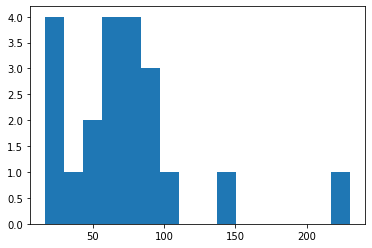

In [86]:
plt.hist(b, bins = 16)
plt.show()

##### найдем выборсы в выборке (используя для этого метод как при построении "усов" из boxplot)

In [74]:
# выборсы в выборке
iqr = Q3 - Q1
boxplot_range_low = Q1 - 1.5 * iqr 
boxplot_range_high = Q3 + 1.5 * iqr

for i in range(len(salary)):
    if salary[i] < boxplot_range_low or salary[i] > boxplot_range_high:
        print(f'Выброс: сумма з/п {salary[i]} с индексом {i}')

Выброс: сумма з/п 230 с индексом 11
Выброс: сумма з/п 150 с индексом 20


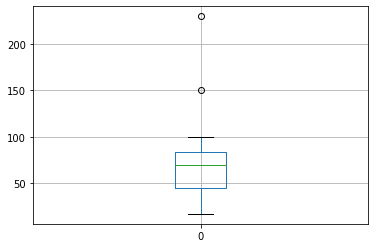

In [71]:
#ОТОБРАЗИМ на графике усов
pd.DataFrame(b).boxplot()

In [79]:
#вычислим с использованием встроенных библиотек
# выборсы в выборке
df = pd.DataFrame(b)
q1 = b.quantile(0.25)
q3 = b.quantile(0.75)
iqr = q3 - q1
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
outliers = df.loc[(b < boxplot_range[0]) | (b > boxplot_range[1])]
print(outliers)

      0
11  230
20  150


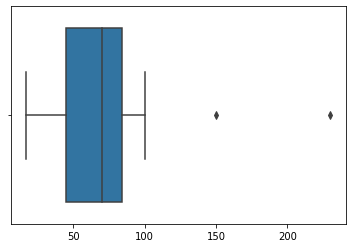

In [87]:
#seaborn -- более симпатичная визуализация
sns.boxplot(df, orient='h')
plt.show()

#### Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.
#### Решение

In [88]:
# Если на факультеты A и B поступило равное количество студентов, 
# а на факультет C студентов поступило столько же, сколько на A и B,
# то на А и В учится по 1/4 всех студентов (0.25), а на С 1/2 (0/5).
# Чтобы оценить безусловную вероятность сдачи первой сессии, воспользуемся формулой полной вероятности:
P = 0.25*0.8 + 0.25*0.7 + 0.5*0.9
print(P)

0.825


In [91]:
# По формуле Байеса:
# вероятность, что студент учится на факультете A:
P_a = 0.25*0.8/0.825
print(P_a)

0.24242424242424246


In [92]:
# вероятность, что студент учится на факультете В:
P_b = 0.25*0.7/0.825
print(P_b)

0.21212121212121213


In [93]:
# в) вероятность, что студент учится на факультете С:
P_c = 0.5*0.9/0.825
print(P_c)

0.5454545454545455


In [94]:
print(P_a+P_b+P_c)

1.0


Ответ: вероятность, что студент учится: 
- a) на факультете A: 0.24(24) 
- б) на факультете B: 0.21(21) 
- в) на факультете C: 0.54(54)